In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
  
# fetch dataset 
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601) 
  
# data (as pandas dataframes) 
X = ai4i_2020_predictive_maintenance_dataset.data.features 
y = ai4i_2020_predictive_maintenance_dataset.data.targets 



In [3]:
X.head()  

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [4]:
y.head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [19]:
print(X.shape)
print(y.shape)
print(X.info())
print(y.info())
print('duplicated rows:', X.duplicated().sum())
print('Target distribution:\n', y['Machine failure'].value_counts())

(10000, 7)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air temperature      10000 non-null  float64
 1   Process temperature  10000 non-null  float64
 2   Rotational speed     10000 non-null  int64  
 3   Torque               10000 non-null  float64
 4   Tool wear            10000 non-null  int64  
 5   Type_L               10000 non-null  bool   
 6   Type_M               10000 non-null  bool   
dtypes: bool(2), float64(3), int64(2)
memory usage: 410.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Machine failure  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB
None
duplicated rows: 0
Target distribution:
 Machine failure
0    9661
1    

In [6]:
X['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [7]:
X = pd.get_dummies(X , columns=['Type'], drop_first=True)
X.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,False,True
1,298.2,308.7,1408,46.3,3,True,False
2,298.1,308.5,1498,49.4,5,True,False
3,298.2,308.6,1433,39.5,7,True,False
4,298.2,308.7,1408,40.0,9,True,False


In [8]:
y = pd.DataFrame(y['Machine failure'])
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [9]:
y.shape

(10000, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numircal_features = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
X_train[numircal_features] = scaler.fit_transform(X_train[numircal_features])
X_test[numircal_features] = scaler.transform(X_test[numircal_features])

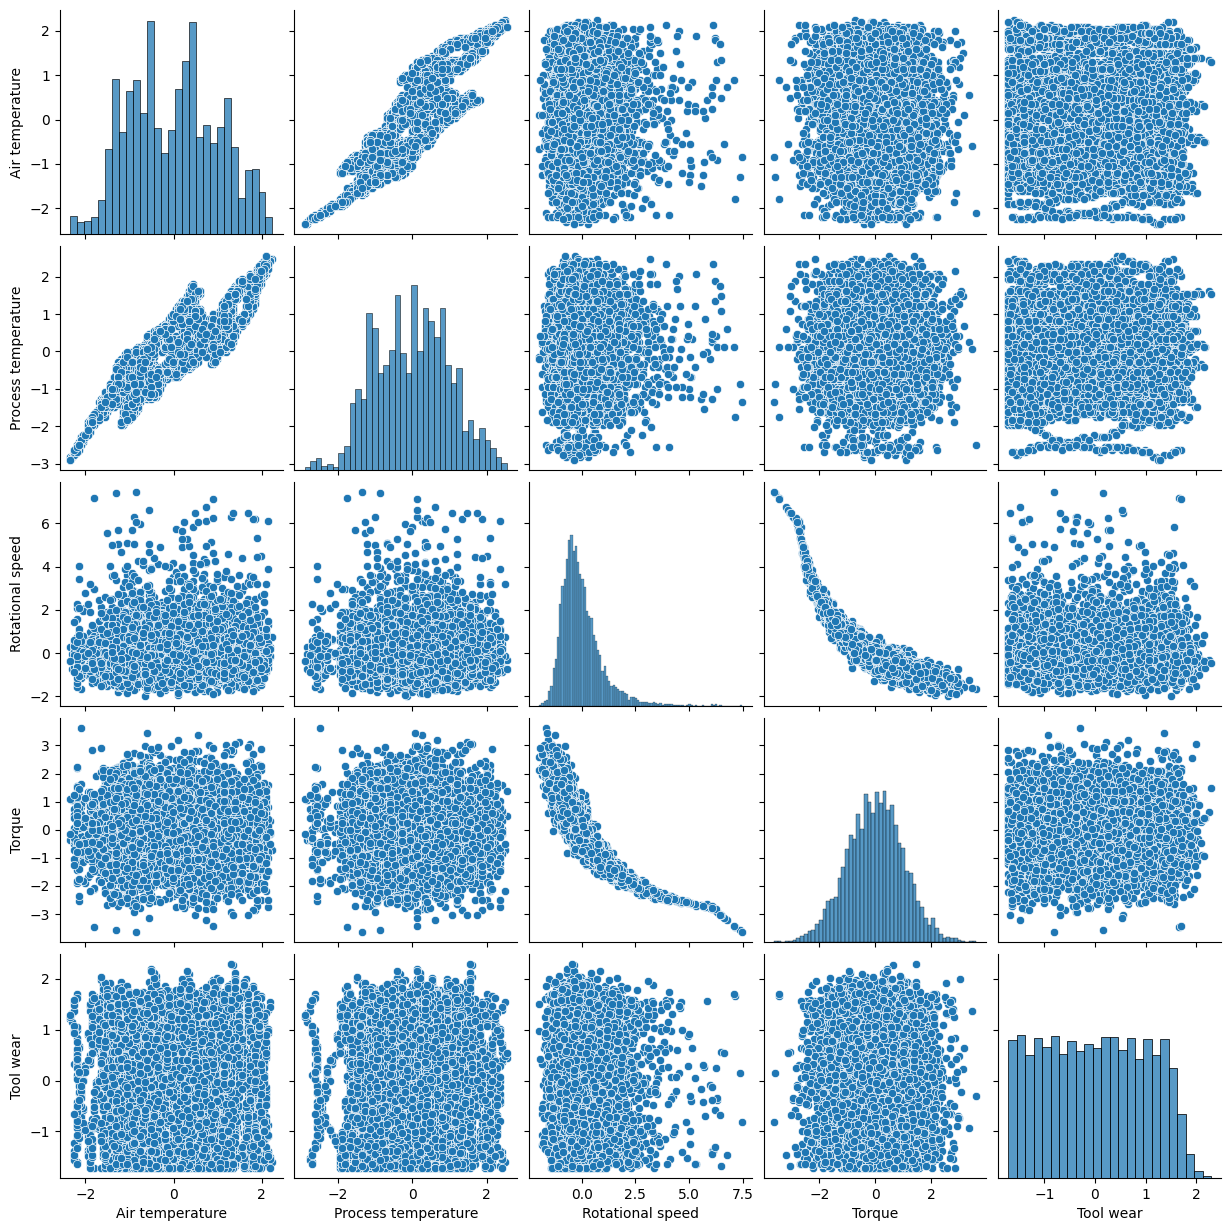

In [11]:
sns.pairplot(X_train[numircal_features])

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix for Logistic Regression Model


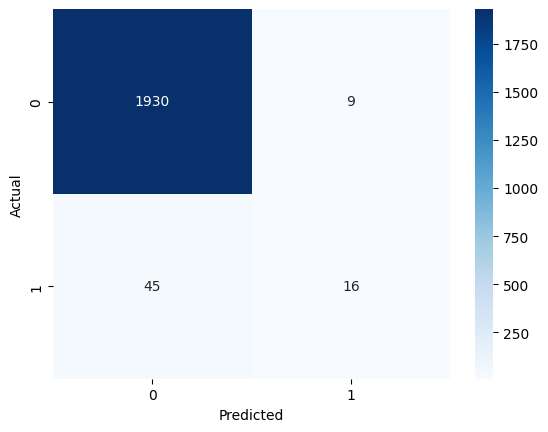

In [13]:
print("Logistic Regression Model")
print(metrics.classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression Model")
cm_logReg = metrics.confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logReg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree = model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)

DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.82      0.30      0.43        61

    accuracy                           0.98      2000
   macro avg       0.90      0.65      0.71      2000
weighted avg       0.97      0.98      0.97      2000

Confusion Matrix for DecisionTreeClassifier Model


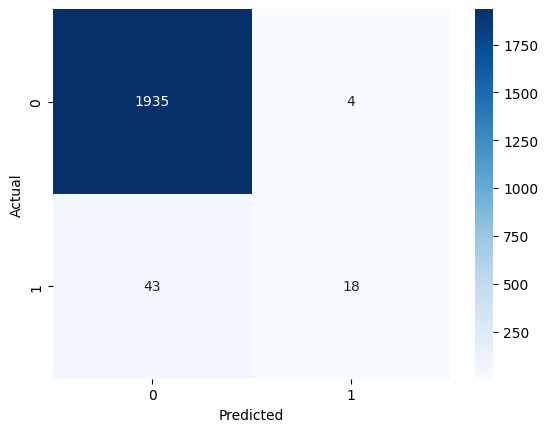

In [15]:
print("DecisionTreeClassifier Model")
print(metrics.classification_report(y_test, y_pred_tree))
print("Confusion Matrix for DecisionTreeClassifier Model")
cm_DT = metrics.confusion_matrix(y_test, y_pred_tree)  
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

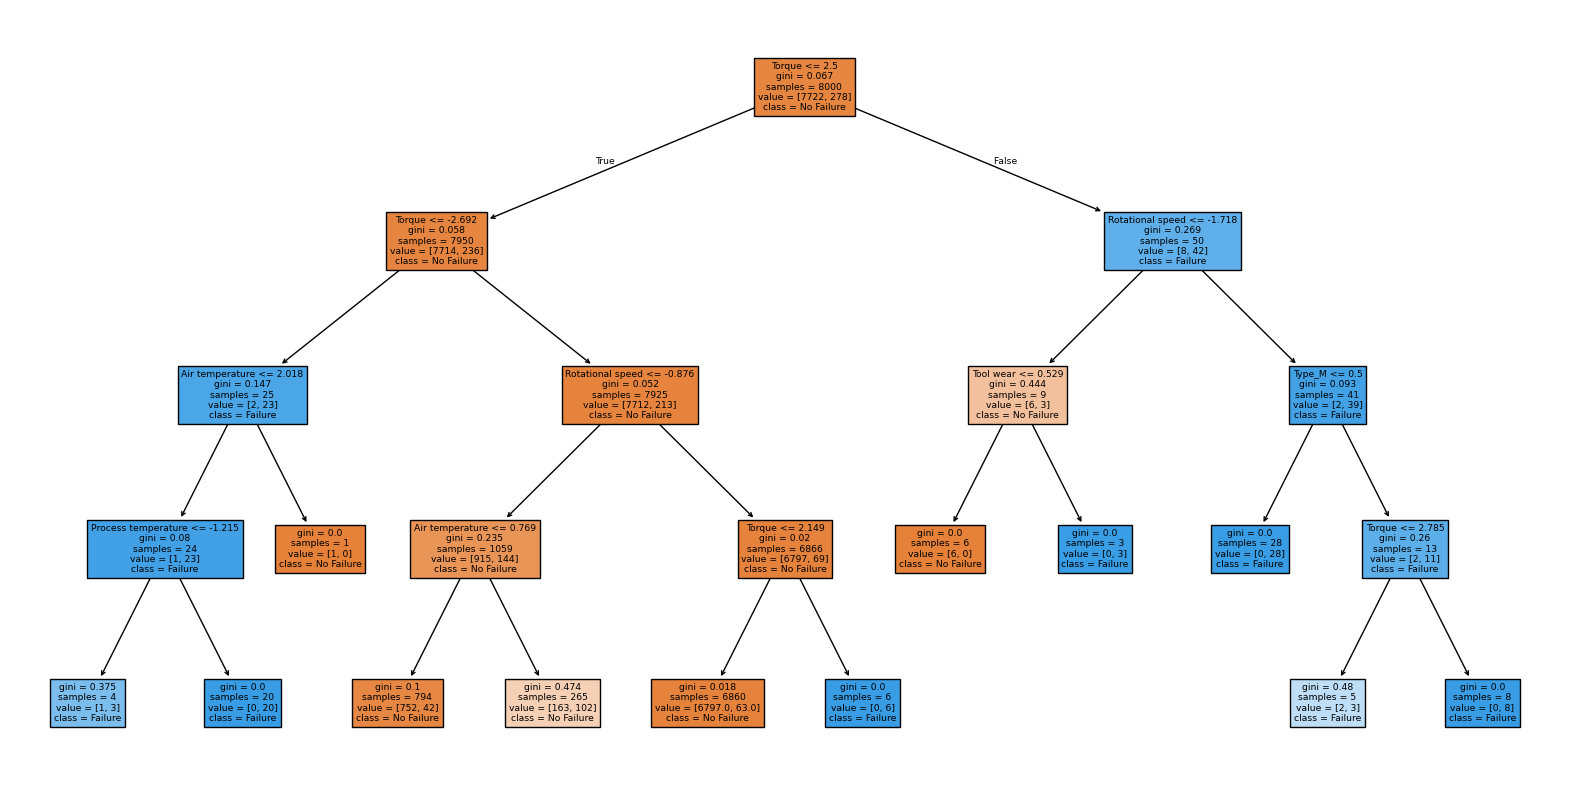

In [16]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['No Failure', 'Failure'])
plt.show()

KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.85      0.38      0.52        61

    accuracy                           0.98      2000
   macro avg       0.92      0.69      0.76      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix for KNeighborsClassifier Model


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


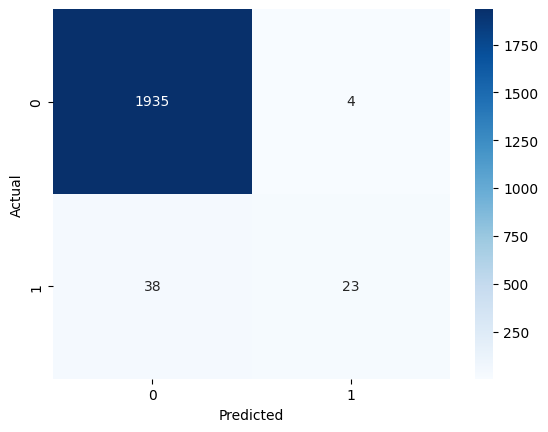

In [17]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print("KNeighborsClassifier Model")
print(metrics.classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNeighborsClassifier Model")
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB Model
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1939
           1       0.36      0.21      0.27        61

    accuracy                           0.96      2000
   macro avg       0.67      0.60      0.62      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix for GaussianNB Model


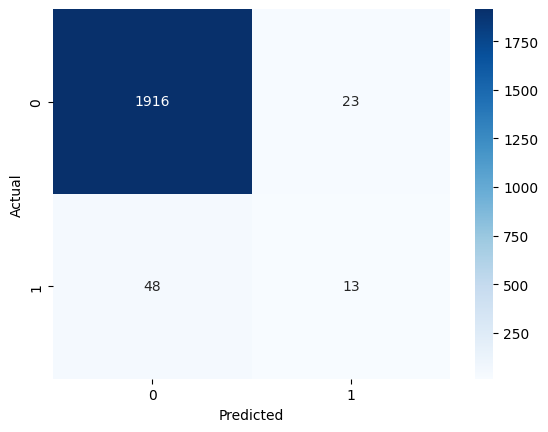

In [18]:
GaussianNB_classifier = GaussianNB()
GaussianNB_classifier.fit(X_train, y_train)
y_pred_GaussianNB = GaussianNB_classifier.predict(X_test)
print("GaussianNB Model")
print(metrics.classification_report(y_test, y_pred_GaussianNB))
print("Confusion Matrix for GaussianNB Model")
cm_GNB = metrics.confusion_matrix(y_test, y_pred_GaussianNB)
sns.heatmap(cm_GNB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
